# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Reading in the dataset

wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
# Re-calibrating

wine['quality'] = wine['quality'].map(lambda x: x-3)

In [4]:
# Defining X and y

X = wine.drop('quality', axis=1)
y = wine['quality']

In [5]:
# Investigating our target

wine['quality'].value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

In [6]:
# Splitting and scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

ss = StandardScaler().fit(X_train)
X_train_s = ss.transform(X_train)
X_test_s = ss.transform(X_test)

In [7]:
# Encoding our target

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Constructing our model

model = Sequential()
n_input = X_train_s.shape[1]
n_hidden = n_input
n_output = y_train.shape[1]

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))

# We want to predict probabilities, so we'll use a softmax activation

model.add(Dense(n_output, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Compiling

# We want to use categorical crossentropy as our optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
# Fitting and saving the history log

history_log = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test), 
                        epochs=42, batch_size=None)

Instructions for updating:
Use tf.cast instead.
Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 79us/step - loss: 1.9167 - acc: 0.2629 - val_loss: 1.5475 - val_acc: 0.4043
Epoch 2/42
4872/4872 [==============================] - 0s 36us/step - loss: 1.3791 - acc: 0.4682 - val_loss: 1.2748 - val_acc: 0.5108
Epoch 3/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.2198 - acc: 0.5201 - val_loss: 1.1936 - val_acc: 0.5403
Epoch 4/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.1630 - acc: 0.5396 - val_loss: 1.1603 - val_acc: 0.5428
Epoch 5/42
4872/4872 [==============================] - 0s 50us/step - loss: 1.1320 - acc: 0.5470 - val_loss: 1.1404 - val_acc: 0.5378
Epoch 6/42
4872/4872 [==============================] - 0s 56us/step - loss: 1.1122 - acc: 0.5581 - val_loss: 1.1261 - val_acc: 0.5348
Epoch 7/42
4872/4872 [==============================] - 0s 53us/step - loss: 1.0978 - acc: 0.5

In [11]:
# Extracting weights

for layer in model.layers:
    print(layer.get_weights())

[array([[ 0.2587266 ,  0.18795633, -0.1397145 , -0.6448904 , -0.6495145 ,
         0.02775624,  0.4886118 ,  0.04137718, -0.2934197 , -0.22692733,
        -0.04404425, -0.04171217],
       [-0.22610764, -0.13616964, -0.10756207, -0.69791204,  0.3844724 ,
        -0.09648746, -0.5543586 , -1.1403152 , -0.40189987, -0.20428482,
         0.29719326,  0.2274947 ],
       [ 0.19128104,  0.53711885,  0.30608642, -0.3796926 , -0.09421651,
         0.27175188, -0.62397826, -0.06792834,  0.46836302,  0.41527507,
        -0.28548464, -0.3072727 ],
       [-0.15588662, -0.0231761 , -0.80057245,  0.5679685 ,  0.34146827,
        -0.06702744,  0.2643528 , -0.1064861 , -0.24101111,  0.18217462,
        -0.03960752, -0.75879115],
       [-0.48300776,  0.09188991, -0.03099051, -0.2743666 ,  0.16474172,
         0.08483428,  0.19857411,  0.02810203,  0.5856936 ,  0.3346602 ,
         0.02485796, -0.09038544],
       [ 0.463161  ,  0.14780809, -0.11376649,  0.14342383,  0.3472644 ,
         0.09971606, 

In [12]:
# Predicting on some test data

model.predict(X_test_s[:5]).round(2)

array([[0.  , 0.  , 0.03, 0.66, 0.24, 0.07, 0.  ],
       [0.01, 0.03, 0.81, 0.14, 0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.04, 0.34, 0.43, 0.18, 0.01],
       [0.  , 0.01, 0.46, 0.48, 0.03, 0.01, 0.  ],
       [0.  , 0.01, 0.62, 0.34, 0.02, 0.  , 0.  ]], dtype=float32)

In [13]:
# Comparing with reality

y_test[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

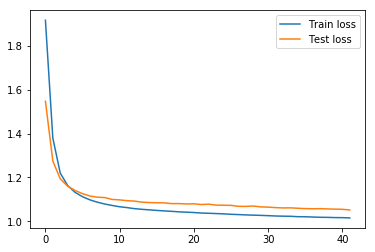

In [14]:
# Plotting

plt.plot(history_log.history['loss'], label='Train loss')
plt.plot(history_log.history['val_loss'], label='Test loss')
plt.legend();

## Adding Regularization

In [16]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(7, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 126us/step - loss: 1.7189 - acc: 0.3875 - val_loss: 1.5294 - val_acc: 0.4634
Epoch 2/42
4872/4872 [==============================] - 0s 54us/step - loss: 1.4529 - acc: 0.4768 - val_loss: 1.4077 - val_acc: 0.4948
Epoch 3/42
4872/4872 [==============================] - 0s 52us/step - loss: 1.3647 - acc: 0.4992 - val_loss: 1.3451 - val_acc: 0.5157
Epoch 4/42
4872/4872 [==============================] - 0s 50us/step - loss: 1.3105 - acc: 0.5207 - val_loss: 1.3018 - val_acc: 0.5157
Epoch 5/42
4872/4872 [==============================] - 0s 53us/step - loss: 1.2712 - acc: 0.5316 - val_loss: 1.2687 - val_acc: 0.5182
Epoch 6/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.2419 - acc: 0.5400 - val_loss: 1.2460 - val_acc: 0.5298
Epoch 7/42
4872/4872 [==============================] - 0s 42us/step - loss: 1.2195 - acc: 0.5480 - val_loss: 1.2276 - val_acc: 0.5354
Epoch 

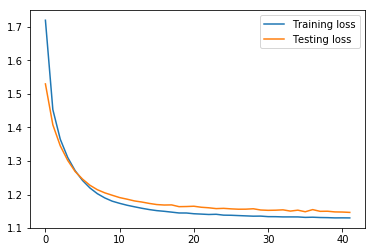

In [17]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [18]:
from keras.layers import Dropout

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2))
model_d.add(Dense(7, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 137us/step - loss: 1.7372 - acc: 0.3313 - val_loss: 1.4660 - val_acc: 0.4197
Epoch 2/42
4872/4872 [==============================] - 0s 44us/step - loss: 1.3902 - acc: 0.4479 - val_loss: 1.2930 - val_acc: 0.4898
Epoch 3/42
4872/4872 [==============================] - 0s 46us/step - loss: 1.2789 - acc: 0.4784 - val_loss: 1.2262 - val_acc: 0.5182
Epoch 4/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.2225 - acc: 0.5076 - val_loss: 1.1914 - val_acc: 0.5157
Epoch 5/42
4872/4872 [==============================] - 0s 47us/step - loss: 1.1960 - acc: 0.5117 - val_loss: 1.1696 - val_acc: 0.5212
Epoch 6/42
4872/4872 [==============================] - 0s 45us/step - loss: 1.1714 - acc: 0.5226 - val_loss: 1.1526 - val_acc: 0.5298
Epoch 7/42
4872/4872 [====

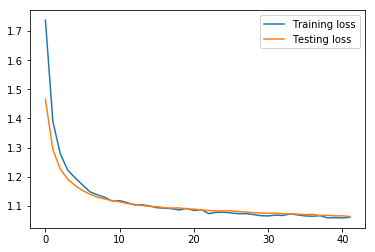

In [19]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [21]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.5498768472906403, 0.539692307472229)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [23]:
from keras.callbacks import EarlyStopping

In [25]:
model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(n_output, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                         epochs=42, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 122us/step - loss: 1.9400 - acc: 0.2504 - val_loss: 1.6165 - val_acc: 0.3852
Epoch 2/42
4872/4872 [==============================] - 0s 42us/step - loss: 1.4280 - acc: 0.4138 - val_loss: 1.2970 - val_acc: 0.4517
Epoch 3/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.2351 - acc: 0.4719 - val_loss: 1.2031 - val_acc: 0.4942
Epoch 4/42
4872/4872 [==============================] - 0s 42us/step - loss: 1.1765 - acc: 0.5086 - val_loss: 1.1723 - val_acc: 0.5102
Epoch 5/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.1480 - acc: 0.5205 - val_loss: 1.1564 - val_acc: 0.5132
Epoch 6/42
4872/4872 [==============================] - 0s 39us/step - loss: 1.1300 - acc: 0.5310 - val_loss: 1.1435 - val_acc: 0.5200
Epoch 7/42
4872/4872 [==============================] - 0s 41us/step - loss: 1.1169 - acc: 0.5314 - val_loss: 1.1342 - val_acc: 0.5262
Epoch 

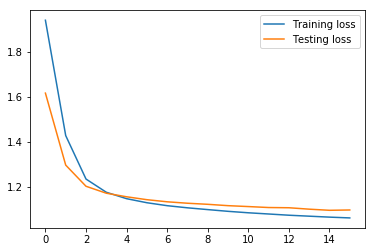

In [26]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();